In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
df = pd.read_csv(r"C:\Users\Hp\Desktop\williams python ml miscellaneous\heart")

In [3]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [4]:
#Verification of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


no null values 


In [5]:
#Statistical analysis
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


from comparing their medians and means  we can see that the columns -Cholesterol	,FastingBS	and FastingBS	all have outliers present in them

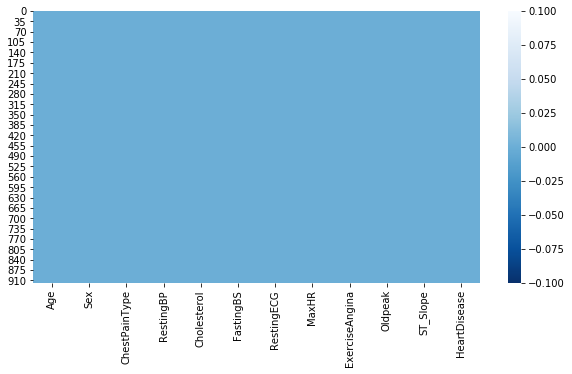

In [6]:
#visualization of misiing data
plt.figure(figsize=(10,5))                            #------ this deterines the size of the plot
sns.heatmap(df.isna(), cbar=True,cmap="Blues_r")      #------- this plots the heatmap

this confirms again that we have no missing data


In [7]:
#dimensionality of the data 
df.shape


(918, 12)

In [8]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

# Exploratory Data analysis

In [9]:
data = df.copy()

In [10]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
#data visualization for age column

#first lets group the age into sub categories called age groups, to do that i will  first create a method that does that

def age_group(age):
    if age <= 44:
        return 'Youth'
    elif age <= 60:
        return 'Adult'
    else:
        return 'Elders'
    
#now lets create a new column named age group that shows the individuals based on this grouping by applying
#the new;y created function above to the age column


data['age_group'] = data['Age'].apply(age_group)
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_group
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Youth
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Youth
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult


Text(0.5, 1.0, 'Total Number of Patients by Age Group')

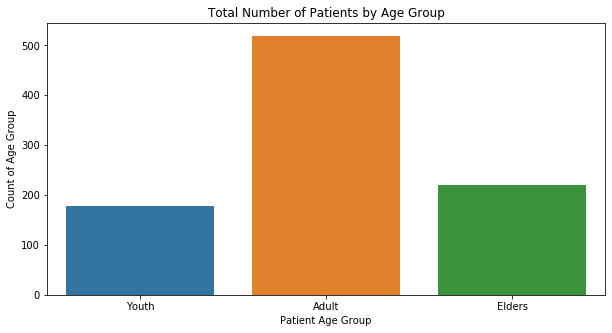

In [12]:
#visualizing the age_group
plt.figure(figsize = (10,5))                                             #------ this deterines the size of the plot
sns.countplot(x = 'age_group', data = data)                               #------ this plots a countplot of age group  column
plt.xlabel('Patient Age Group')                                            #------ this names the x axis
plt.ylabel('Count of Age Group')                                            #------ this names the y axis
plt.title('Total Number of Patients by Age Group')                           #------ this gives a tittle to the plot

most of the patients are adults that is between age 45-60

Text(0.5, 1.0, 'Total Number of Patients by sex')

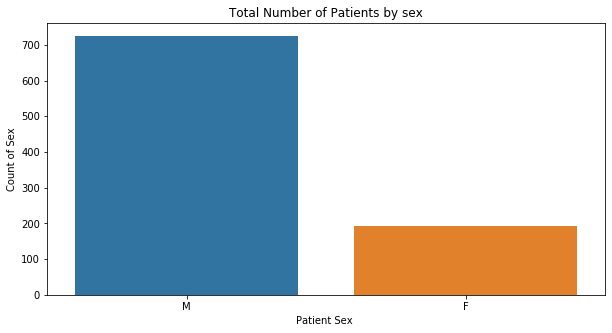

In [13]:
#data visualization for sex

plt.figure(figsize = (10,5))                                      #------ this deterines the size of the plot
sns.countplot(x = 'Sex', data = data)                              #------ this plots a countplot of sex  column
plt.xlabel('Patient Sex ')                                          #------ this names the x axis
plt.ylabel('Count of Sex')                                           #------ this names the y axis
plt.title('Total Number of Patients by sex')                          #------ this gives a tittle to the plot

we have more male patients than female 

In [14]:
#data visualization for chest pain type



def chest_pain(chestpain):
    if chestpain == 'ASY':
        return 'Asyptomatic'
    elif chestpain == 'NAP':
        return 'Non-anginal Pain'
    elif chestpain == 'ATA':
        return 'Atypical anginal'
    else:
        return 'Typical anginal'

data['chestpain'] = data['ChestPainType'].apply(chest_pain)
data.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_group,chestpain
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Youth,Atypical anginal
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult,Non-anginal Pain
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Youth,Atypical anginal
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult,Asyptomatic
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult,Non-anginal Pain


Text(0.5, 1.0, 'Total number of patients grouped by chest pain')

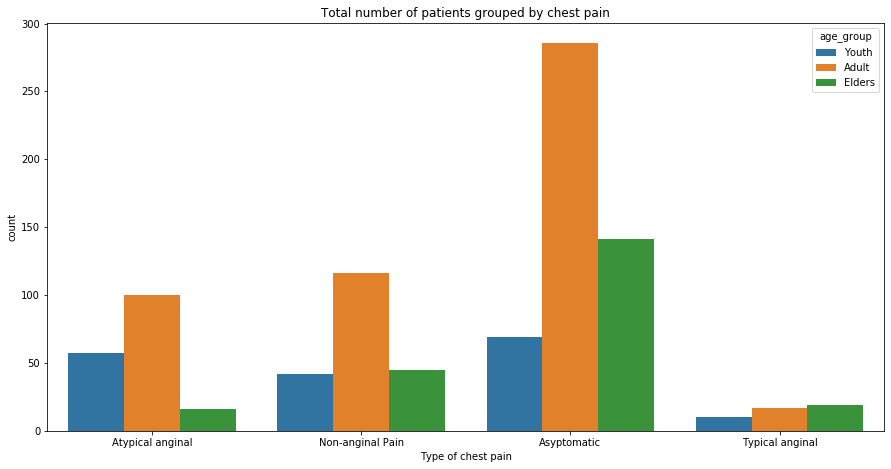

In [15]:
#visualizing the chestpain type 
plt.figure(figsize = (15,7.5))
sns.countplot(x = 'chestpain', data = data , hue ='age_group')
plt.xlabel('Type of chest pain')
plt.title('Total number of patients grouped by chest pain')

Text(0.5, 1.0, 'Total number of patients grouped by Resting ECG')

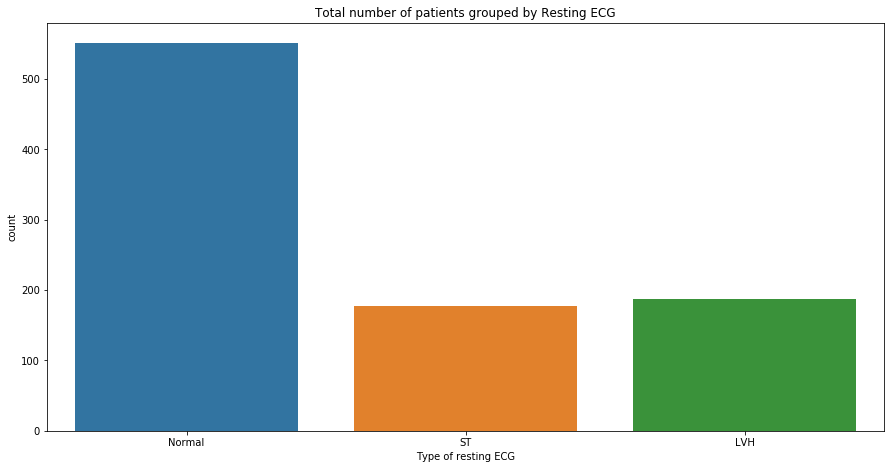

In [16]:
#data visualization for resting ecg
plt.figure(figsize = (15,7.5))
sns.countplot(x = 'RestingECG', data = data)
plt.xlabel('Type of resting ECG')
plt.title('Total number of patients grouped by Resting ECG')

Text(0.5, 1.0, 'Total number of patients grouped by Exercise Angina')

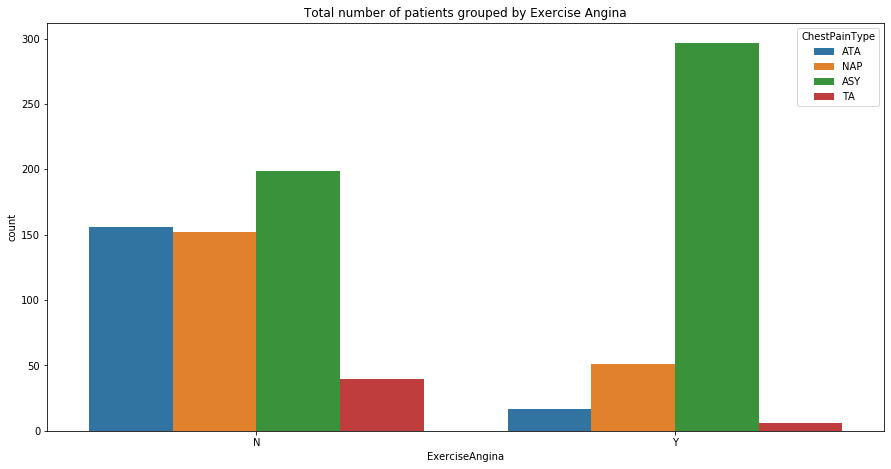

In [17]:
#data visualization for resting exercise angina
plt.figure(figsize = (15,7.5))
sns.countplot(x = 'ExerciseAngina', data = data , hue = 'ChestPainType')
plt.title('Total number of patients grouped by Exercise Angina')

(array([  1.,   0.,   0.,   0.,  12., 148., 430., 234.,  73.,  20.]),
 array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200.]),
 <a list of 10 Patch objects>)

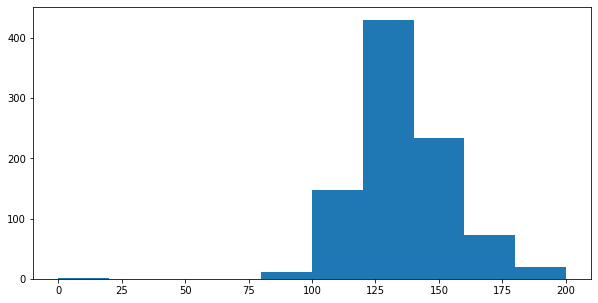

In [18]:
#data visualization for resting bp
plt.figure(figsize= (10,5))
plt.hist(x=data['RestingBP'], bins = 10)

(array([172.,   0.,   1.,   5.,  14.,  56., 136., 183., 145., 103.,  57.,
         24.,   5.,   9.,   0.,   3.,   1.,   2.,   1.,   1.]),
 array([  0.  ,  30.15,  60.3 ,  90.45, 120.6 , 150.75, 180.9 , 211.05,
        241.2 , 271.35, 301.5 , 331.65, 361.8 , 391.95, 422.1 , 452.25,
        482.4 , 512.55, 542.7 , 572.85, 603.  ]),
 <a list of 20 Patch objects>)

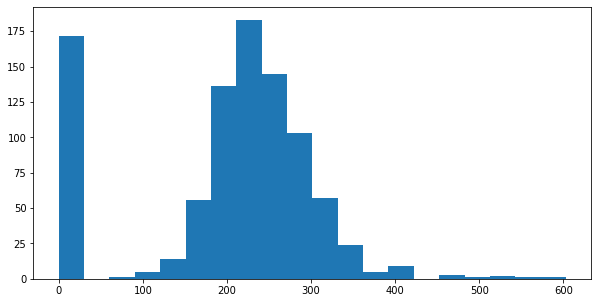

In [19]:
#data visualization for cholesterol
plt.figure(figsize= (10,5))
plt.hist(x=data['Cholesterol'], bins = 20)

(array([  9.,  18.,  62., 113., 192., 175., 148., 132.,  61.,   8.]),
 array([ 60. ,  74.2,  88.4, 102.6, 116.8, 131. , 145.2, 159.4, 173.6,
        187.8, 202. ]),
 <a list of 10 Patch objects>)

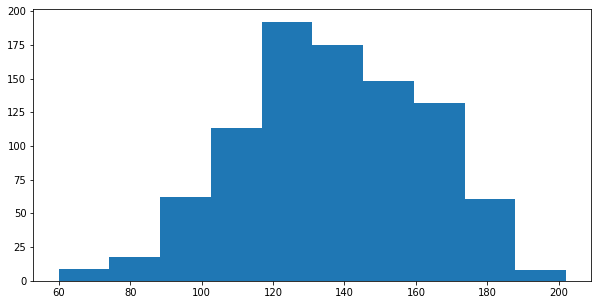

In [20]:
#data visualization for max HR
plt.figure(figsize= (10,5))
plt.hist(x=data['MaxHR'], bins = 10)

In [21]:
#data visualization for heart disease 

def heart_d(hd):
    if hd == 1:
        return ' Yes'
    else:
        return 'No'
    
data['heart_d'] = data['HeartDisease'].apply(heart_d)
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,age_group,chestpain,heart_d
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,Youth,Atypical anginal,No
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,Adult,Non-anginal Pain,Yes
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,Youth,Atypical anginal,No
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,Adult,Asyptomatic,Yes
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,Adult,Non-anginal Pain,No


Text(0.5, 1.0, 'Total number of Patients by Label')

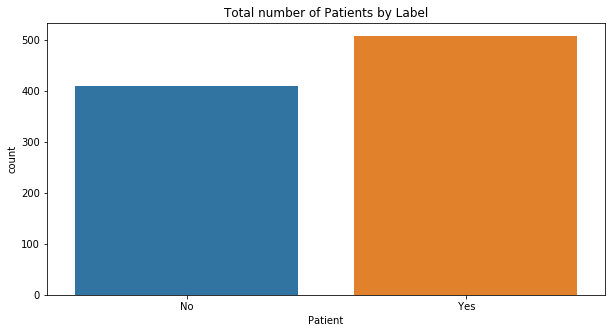

In [22]:
plt.figure(figsize = (10,5))
sns.countplot(x= 'heart_d', data= data)
plt.xlabel('Patient')
plt.title('Total number of Patients by Label')

the  data set is unbalanced 

In [23]:
#correlation
correlation = df.corr()
correlation

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


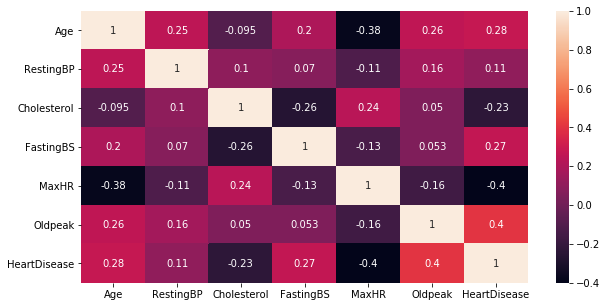

In [24]:
#visualization of correlation
plt.subplots(figsize=(10,5))
sns.heatmap(correlation , annot = True)

# Machine learning part 

In [25]:
df1 = df.copy()

In [26]:
df1 = df1.drop('HeartDisease', axis = 1)
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [27]:
label = df[['HeartDisease']]
label.head()

,HeartDisease
0,0
1,1
2,0
3,1
4,0


In [28]:
#label encoding
cut_columns = ['Sex','ChestPainType','RestingECG','ExerciseAngina','ST_Slope']

In [29]:
 from sklearn import preprocessing

In [30]:
for i in cut_columns:
    le = preprocessing.LabelEncoder()
    df1[i] = le.fit_transform(df1[i])
    df1.head()

In [31]:
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,1,1,140,289,0,1,172,0,0.0,2
1,49,0,2,160,180,0,1,156,0,1.0,1
2,37,1,1,130,283,0,2,98,0,0.0,2
3,48,0,0,138,214,0,1,108,1,1.5,1
4,54,1,2,150,195,0,1,122,0,0.0,2


In [32]:
#Train,Test, Split 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df1,label,test_size = 0.2)

In [33]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [34]:
#metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score


score_list={}
cross_cal_list={}
roc_auc_list={}
accuracy_score_list={}


classifiers = [[XGBClassifier(),'XGB Classifier'], 
               [RandomForestClassifier(),'Random Forest'],
               [KNeighborsClassifier(), 'K-Nearest Neighbours'], 
               [SGDClassifier(),'SGD Classifier'], 
               [SVC(),'SVC'],
               [GaussianNB(), "Naive Bayes"], 
               [DecisionTreeClassifier(random_state = 42), "Decison tree"],
               [LogisticRegression(), 'Logistic Regression']
              ]

for i in classifiers:
    model = i[0]
    model.fit(x_train,y_train)
    model_name = i[1]
    pred = model.predict(x_test)
    
    score = model.score(x_test,y_test)
    cross_val = cross_val_score(model,x_test,y_test).mean()
    roc_auc = roc_auc_score(y_test,pred)
    accuracy = accuracy_score(y_test,pred)

C:\Users\Hp\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaco

[22:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[22:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

C:\Users\Hp\anaconda3\lib\site-packages\ipykernel_launcher.py:39: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [40]:
score_list[model_name] = ([str(round(score*100,2)) + '%'])
cross_cal_list[model_name] = ([str(round(cross_val*100,2)) + '%'])
roc_auc_list[model_name] = ([str(round(roc_auc*100,2)) + '%'])
accuracy_score_list[model_name] = ([str(round(accuracy*100,2)) + '%'])

print(accuracy_score_list)

{'Logistic Regression': ['84.78%']}


In [36]:
pip install pivottablejs

Note: you may need to restart the kernel to use updated packages.


In [37]:
from pivottablejs import pivot_ui


In [38]:
pivot_ui(df)
